In [ ]:
https://github.com/simonbatzner/L-BFGS-Julia
https://github.com/simonbatzner/L-BFGS-Julia/blob/master/L-BFGS_Project_Comp.ipynb
https://simonbatzner.github.io/L-BFGS-Julia/
https://github.com/JuliaNLSolvers/Optim.jl
https://github.com/tomgoldstein/loss-landscape
http://mth229.github.io/graphing.html

In [1]:
using Pkg
Pkg.add("Optim")
Pkg.add("LineSearches")
Pkg.add("Plots")
Pkg.add("PyPlots")

LoadError: The following package names could not be resolved:
 * PyPlots (not found in project, manifest or registry)


In [2]:
using Optim, LineSearches, Plots, LLVM, PyPlots
f(x) = exp(-x^2/2)
plot(f, -3, 3)

LoadError: ArgumentError: Package PyPlots not found in current path:
- Run `import Pkg; Pkg.add("PyPlots")` to install the PyPlots package.


# JUST a HEADLINE

In [9]:
x0 = [0.0, 0.0]
mem_tot = 0 

mem = @allocated optimize(f, x0)
mem_tot += mem
println("Average memory in [kB] allocated fcjon: $(mem_tot/*1000))")

LoadError: MethodError: no method matching ^(::Vector{Float64}, ::Int64)
[0mClosest candidates are:
[0m  ^([91m::Union{AbstractChar, AbstractString}[39m, ::Integer) at strings/basic.jl:718
[0m  ^([91m::Complex{var"#s79"} where var"#s79"<:AbstractFloat[39m, ::Integer) at complex.jl:818
[0m  ^([91m::Complex{var"#s79"} where var"#s79"<:Integer[39m, ::Integer) at complex.jl:820
[0m  ...

In [9]:
z = rosenbrock(x; a=1, b=5) = (a-x[1])^2 + b*(x[2] - x[1]^2)^2
rosenbrock(x) = (1-x[1])^2 + 100*(x[2]-x[1]^2)^2
himmelblau(x) =(x[1]^2+x[2]-11)^2+(x[1]+x[2]^2-7)^2
booth(x) =(x[1]+2*x[2]-7)^2+(2*x[1]+x[2]-5)^2

booth (generic function with 1 method)

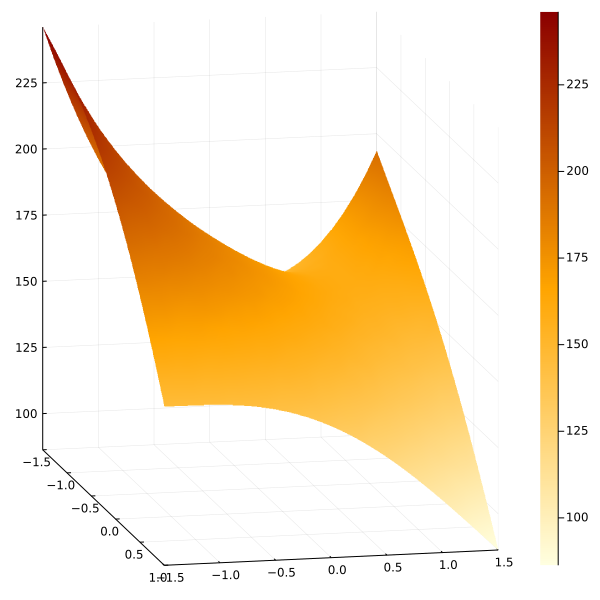

In [7]:
using Plots

function himmelblau(x::Vector)
    return (x[1]^2+x[2]-11)^2+(x[1]+x[1]x[2]^2-7)^2
end


default(size=(600,600), fc=:heat)
x, y = -1.5:0.1:1, -1.5:0.1:1.5
z = Surface((x,y)->himmelblau([x,y]), x, y)
surface(x,y,z,w = 1, camera=(70,30))

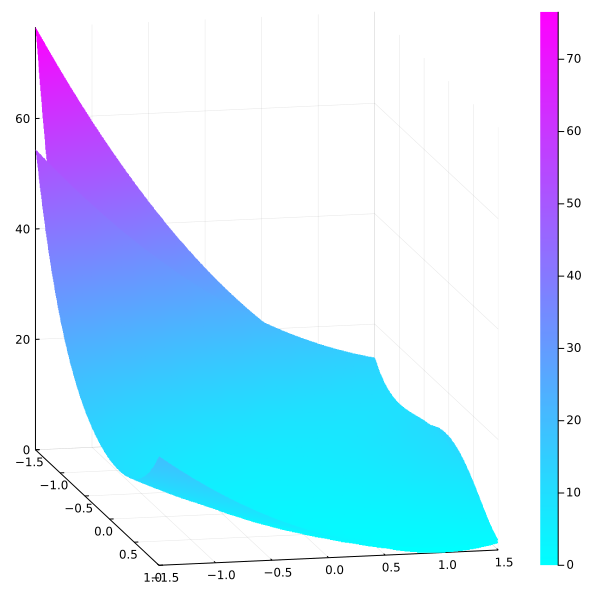

In [2]:
using Plots

function rosenbrock(x::Vector)
    return (1.0-x[1])^2 + 5.0*(x[2] - x[1]^2)^2
end

function rosenbrockk(x::Vector)
    return (2.0-x[1])^2 + 3.0*(x[2] - x[1]^2)^2
end


default(size=(600,600), fc=:cool)
x, y = -1.5:0.1:1, -1.5:0.1:1.5
z = Surface((x,y)->rosenbrock([x,y]), x, y)
z2 = Surface((x,y)->rosenbrockk([x,y]), x, y)
surface(x,y,z,w = 1, camera=(70,30))
surface!(x,y,z2,w = 1, camera=(70,30), c = :heat)

In [8]:
rosenbrock(x::Vector; a=1, b=5) = (a-x[1])^2 + b*(x[2] - x[1]^2)^2
θ = [0.75, 2.0]
#rosenbrock(θ)

function rosenbrock(x::Vector ; a=1, b=5)
  return (a-x[1])^2 + b*(x[2] - x[1]^2)^2
end

default(size=(600,600), fc=:heat)
x, y = -1.5:0.1:1, -1.5:0.1:2
z = Surface(rosenbrock(θ), x, y)
surface(x,y,z, linealpha = 0.3)

LoadError: MethodError: no method matching Surface(::Float64, ::StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}, ::StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}})
[0mClosest candidates are:
[0m  Surface([91m::Function[39m, ::Any, ::Any) at /home/michal/.julia/packages/RecipesPipeline/CirY4/src/utils.jl:77

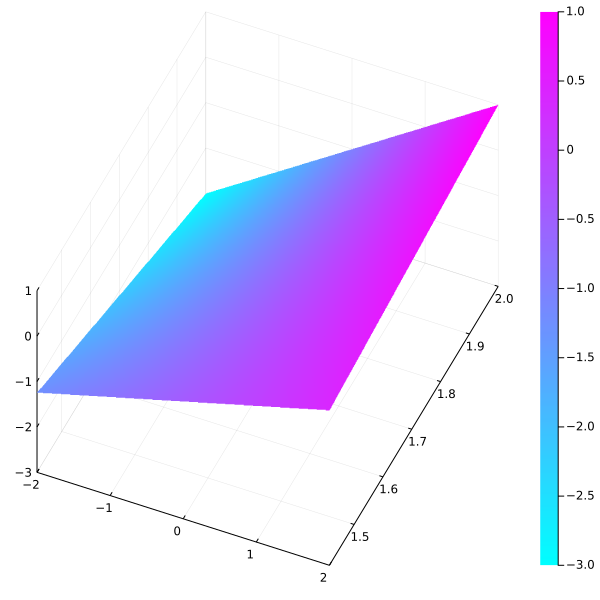

In [17]:
using Plots
x=range(-2,stop=2,length=100)
y=range(sqrt(2),stop=2,length=100)
f(x,y) = x*y-x-y+1
plot(x,y,f,st=:surface,camera=(30,70))

In [34]:
include("bfgs.jl")
include("l-bfgs.jl")
include("gd.jl")

rosenbrock(x; a=1, b=5) = (a-x[1])^2 + b*(x[2] - x[1]^2)^2
rosenbrockGrad(x; a=1, b=5) = [2*(x[1]-a)-2*b*x[1]*(x[2]-x[1]^2), 2*b*(x[2] - x[1]^2)]

mem_tot = 0 

M=BFGS()
myBFGS = init!(M,[0.75, 2.0])
θ = [0.75, 2.0]
println("BFGS")
for i in 1:5
    global θ
    println(θ)
    println(rosenbrock(θ))
    θ′ = step!(myBFGS,rosenbrock,rosenbrockGrad, θ)
    θ = θ′
    println("////////")
end

println("//////////////////////////////")

M=LBFGS()
myLBFGS = init!(M,2) #im wikeszy 2 parametr tym wiecej pamieci i lepsze wyniki
θ2 = [0.75, 2.0]
println("L-BFGS")
for i in 1:5
    global θ2
    println(θ2)
    println(rosenbrock(θ2))
    θ′2 = step!(myLBFGS,rosenbrock,rosenbrockGrad, θ2)
    θ2 = θ′2
    println("//////")
end

println("//////////////////////////////")

M=GD()
myGD = init!(M,0.01) #im wikeszy 2 parametr tym wiecej pamieci i lepsze wyniki
θ3 = [0.75, 2.0]
println("GRADIENT DESCENT")
for i in 1:5
    global θ3
    println(θ3)
    println(rosenbrock(θ3))
    θ′3 = step!(myGD,rosenbrock,rosenbrockGrad, θ3)
    θ3 = θ′3
    println("//////")
end

BFGS
[0.75, 2.0]
10.39453125
////////
[1.1934630470154866, 1.4349224331658619]
0.037986404745810984
////////
[1.1853497657939938, 1.4285103747095267]
0.037105527473874536
////////
[1.1796892259544196, 1.4218865919724293]
0.03685443639468315
////////
[1.1773171015643373, 1.4188665558773477]
0.036817602335546346
////////
//////////////////////////////
L-BFGS
[0.75, 2.0]
10.39453125
//////
[1.1934630470154866, 1.4349224331658619]
0.037986404745810984
//////
[1.1906450171639777, 1.434560446140889]
0.037777781948973715
//////
[1.1866928521713047, 1.4315194133519304]
0.037563893849665304
//////
[1.1846527393935042, 1.42956545898022]
0.037519237542347615
//////
//////////////////////////////
GRADIENT DESCENT
[0.75, 2.0]
10.39453125
//////
[0.8628125, 1.85625]
6.199367640144397
//////
[0.9614841397674561, 1.745069541015625]
3.3685512577401515
//////
[1.0411555559608687, 1.663007762016499]
1.677915398912775
//////
[1.1006156503755304, 1.6051074749856675]
0.7853293156015861
//////
